<a href="https://colab.research.google.com/github/Venkatesh-122/Employee-_Salary_Prediction-Madana_Venkatesh/blob/main/Employee_Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [331]:
import pandas as pd

# Read the dataset
df = pd.read_csv('/content/ds_salaries.csv')

# Show first 5 rows
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [332]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [333]:
# Shape of the dataset (rows, columns)
print("Shape:", df.shape)

# Column names and data types
df.info()

Shape: (3755, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [334]:
# Summary of numerical columns
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [335]:
# Count missing values in each column
df.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [336]:
# Count unique values in each column
df.nunique()

,0
work_year,4
experience_level,4
employment_type,4
job_title,93
salary,815
salary_currency,20
salary_in_usd,1035
employee_residence,78
remote_ratio,3
company_location,72


In [337]:
# Show value counts for all categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:\n", df[col].value_counts())
    print("-"*30)


experience_level:
 experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64
------------------------------

employment_type:
 employment_type
FT    3718
PT      17
CT      10
FL      10
Name: count, dtype: int64
------------------------------

job_title:
 job_title
Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
                             ... 
Principal Data Architect        1
Head of Machine Learning        1
Cloud Data Architect            1
Staff Data Scientist            1
Finance Data Analyst            1
Name: count, Length: 93, dtype: int64
------------------------------

salary_currency:
 salary_currency
USD    3224
EUR     236
GBP     161
INR      60
CAD      25
AUD       9
BRL       6
SGD       6
PLN       5
CHF       4
TRY       3
HUF       3
DKK       3
JPY       3
THB       2
HKD       1
ILS       1
CZK       1
MXN      

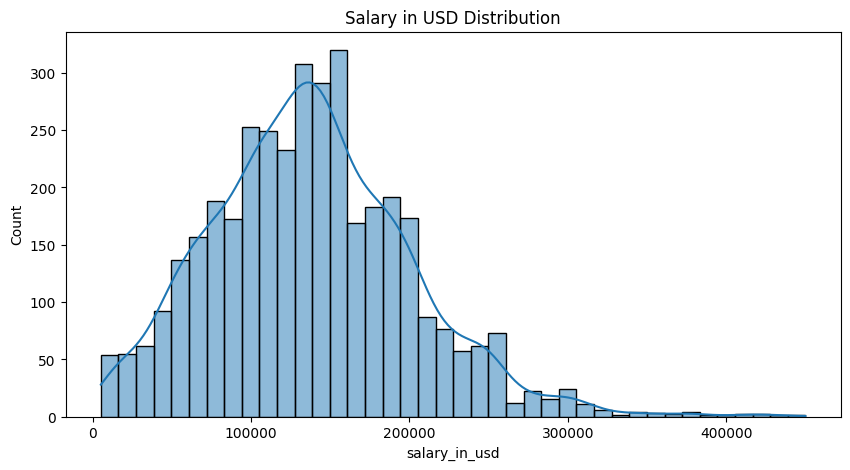

In [338]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['salary_in_usd'], bins=40, kde=True)
plt.title("Salary in USD Distribution")
plt.show()

In [339]:
df = df[df['experience_level'] != 'EX']

In [340]:
df = df[~df['employment_type'].isin(['PT', 'CT', 'FL'])]

In [341]:
job_title_counts = df['job_title'].value_counts()
df = df[df['job_title'].isin(job_title_counts[job_title_counts > 50].index)]
job_title_counts['Data Engineer']

np.int64(986)

In [366]:
salary_currency_counts = df['salary_currency'].value_counts()
df = df[df['salary_currency'].isin(salary_currency_counts[salary_currency_counts > 10].index)]
salary_currency_counts

,count
salary_currency,
USD,2179
GBP,81


In [365]:
employee_residence_counts = df['employee_residence'].value_counts()
df = df[df['employee_residence'].isin(employee_residence_counts[employee_residence_counts > 50].index)]
employee_residence_counts

,count
employee_residence,
US,2174
GB,86
ES,3


In [364]:
company_location_counts = df['company_location'].value_counts()
df = df[df['company_location'].isin(company_location_counts[company_location_counts > 50].index)]
company_location_counts

,count
company_location,
US,2176
GB,87
CA,43
ES,9


In [345]:
df = df[df['company_size'] != 'S']
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3740,2020,SE,FT,Data Science Manager,190200,USD,190200,US,100,US,M
3741,2020,MI,FT,Data Scientist,118000,USD,118000,US,100,US,M
3742,2020,MI,FT,Data Scientist,138350,USD,138350,US,100,US,M
3743,2020,MI,FT,Data Engineer,130800,USD,130800,ES,100,US,M


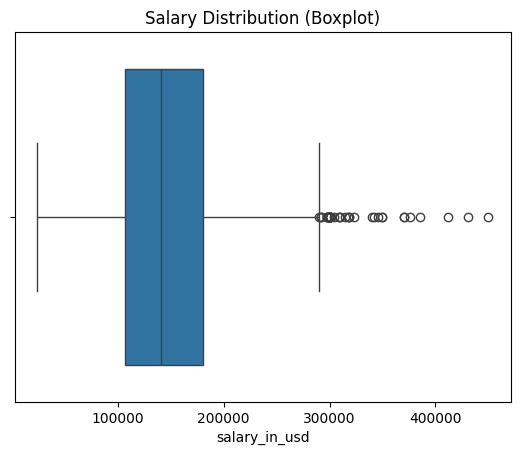

In [346]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['salary_in_usd'])
plt.title("Salary Distribution (Boxplot)")
plt.show()

In [347]:
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 0.5 * IQR
upper_bound = Q3 + 0.5 * IQR

df = df[(df['salary_in_usd'] >= lower_bound) & (df['salary_in_usd'] <= upper_bound)]

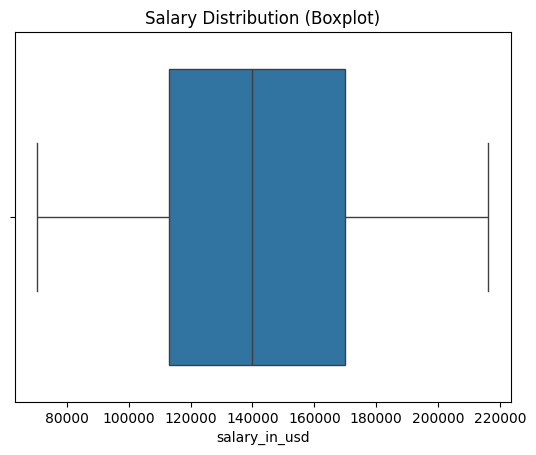

In [348]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['salary_in_usd'])
plt.title("Salary Distribution (Boxplot)")
plt.show()

In [349]:
print("Final dataset shape:", df.shape)

Final dataset shape: (2315, 11)


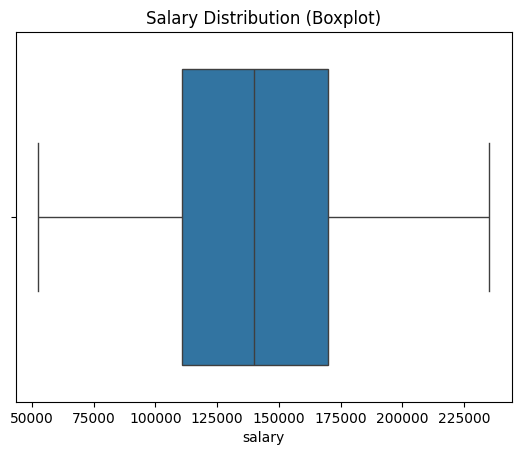

In [350]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['salary'])
plt.title("Salary Distribution (Boxplot)")
plt.show()

In [351]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns
cat_cols = df.select_dtypes(include='object').columns

# Apply OneHotEncoding
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [352]:
df_encoded

,work_year,salary,salary_in_usd,remote_ratio,experience_level_MI,experience_level_SE,job_title_Applied Scientist,job_title_Data Analyst,job_title_Data Architect,job_title_Data Engineer,...,salary_currency_EUR,salary_currency_GBP,salary_currency_USD,employee_residence_ES,employee_residence_GB,employee_residence_US,company_location_ES,company_location_GB,company_location_US,company_size_M
3,2023,175000,175000,100,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,2023,120000,120000,100,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
6,2023,136000,136000,0,False,True,True,False,False,False,...,False,False,True,False,False,True,False,False,True,False
8,2023,141000,141000,0,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
9,2023,147100,147100,0,False,True,False,False,False,False,...,False,False,True,False,False,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3738,2021,73000,73000,0,True,False,False,False,False,False,...,False,False,True,False,False,True,False,False,True,False
3740,2020,190200,190200,100,False,True,False,False,False,False,...,False,False,True,False,False,True,False,False,True,True
3741,2020,118000,118000,100,True,False,False,False,False,False,...,False,False,True,False,False,True,False,False,True,True
3742,2020,138350,138350,100,True,False,False,False,False,False,...,False,False,True,False,False,True,False,False,True,True


In [353]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Step 1: Define features and target
X = df_encoded.drop(columns=['salary_in_usd'])  # Drop target
y = df_encoded['salary_in_usd']                 # Target

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train a baseline model (Random Forest)
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Step 5: Predict and evaluate
y_pred = model.predict(X_test_scaled)
print("✅ R² Score on Test Set:", r2_score(y_test, y_pred))

✅ R² Score on Test Set: 0.9994936059588904


In [354]:
# R² on training set
y_train_pred = model.predict(X_train_scaled)
print("🧪 R² Score on Training Set:", r2_score(y_train, y_train_pred))

🧪 R² Score on Training Set: 0.9995459737463372


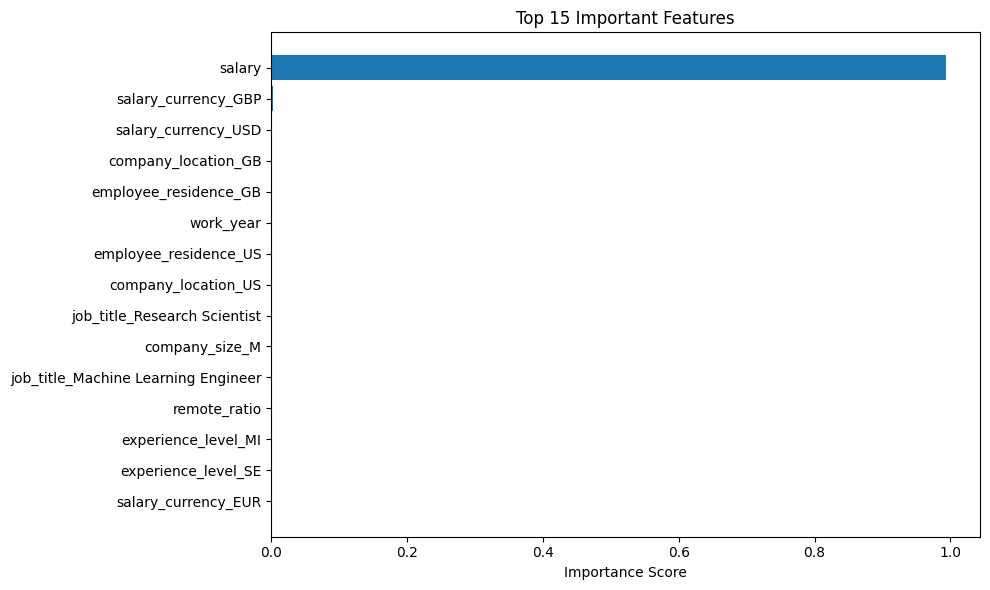

In [355]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_
features = X.columns

# Plot
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Top 15 important features
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'].head(15), importance_df['Importance'].head(15))
plt.gca().invert_yaxis()
plt.title("Top 15 Important Features")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

In [356]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Step 1: Split Data
X = df_encoded.drop(columns=['salary_in_usd'])
y = df_encoded['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Define Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "HistGradientBoosting": HistGradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(128, 64),activation='relu',solver='adam',learning_rate_init=0.001,max_iter=5000,early_stopping=True,validation_fraction=0.1,n_iter_no_change=10,random_state=42)
}

# Step 4: Evaluate Each Model
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append((name, r2, mae, rmse))

# Step 5: Display Results
results_df = pd.DataFrame(results, columns=["Model", "R² Score", "MAE", "RMSE"])
print(results_df.sort_values(by="R² Score", ascending=False))

                  Model  R² Score          MAE         RMSE
2         Random Forest  0.999494   156.513564   817.164700
0     Linear Regression  0.999422   207.668000   873.069915
4               XGBoost  0.999420   231.385254   874.680120
3  HistGradientBoosting  0.999167   437.795437  1048.033619
1         Decision Tree  0.997936   156.598272  1649.636657
5         MLP Regressor  0.974374  3228.254864  5813.097909


In [357]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor, StackingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 1: Train-test split
X = df_encoded.drop(columns=['salary_in_usd'])
y = df_encoded['salary_in_usd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "HistGradientBoosting": HistGradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(128, 64),activation='relu',solver='adam',learning_rate_init=0.001,early_stopping=True,validation_fraction=0.1,max_iter=3000,random_state=42)
}

# Step 4: Add stacking model
base_models = [
    ('rf', RandomForestRegressor(random_state=42)),
    ('xgb', XGBRegressor(random_state=42, verbosity=0))
]
stack_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())
models["Stacked Model"] = stack_model

# Step 5: Evaluate models
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append((name, r2, mae, rmse))
    print(f"✅ {name} | R²: {r2:.4f} | MAE: {mae:.2f} | RMSE: {rmse:.2f}")

✅ Linear Regression | R²: 0.9994 | MAE: 207.67 | RMSE: 873.07
✅ Decision Tree | R²: 0.9979 | MAE: 156.60 | RMSE: 1649.64
✅ Random Forest | R²: 0.9995 | MAE: 156.51 | RMSE: 817.16
✅ HistGradientBoosting | R²: 0.9992 | MAE: 437.80 | RMSE: 1048.03
✅ XGBoost | R²: 0.9994 | MAE: 231.39 | RMSE: 874.68
✅ Neural Network | R²: 0.9744 | MAE: 3228.25 | RMSE: 5813.10
✅ Stacked Model | R²: 0.9995 | MAE: 236.30 | RMSE: 796.59


Training Linear Regression...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training Hist Gradient Boosting...
Training XGBoost...
Training Neural Network...


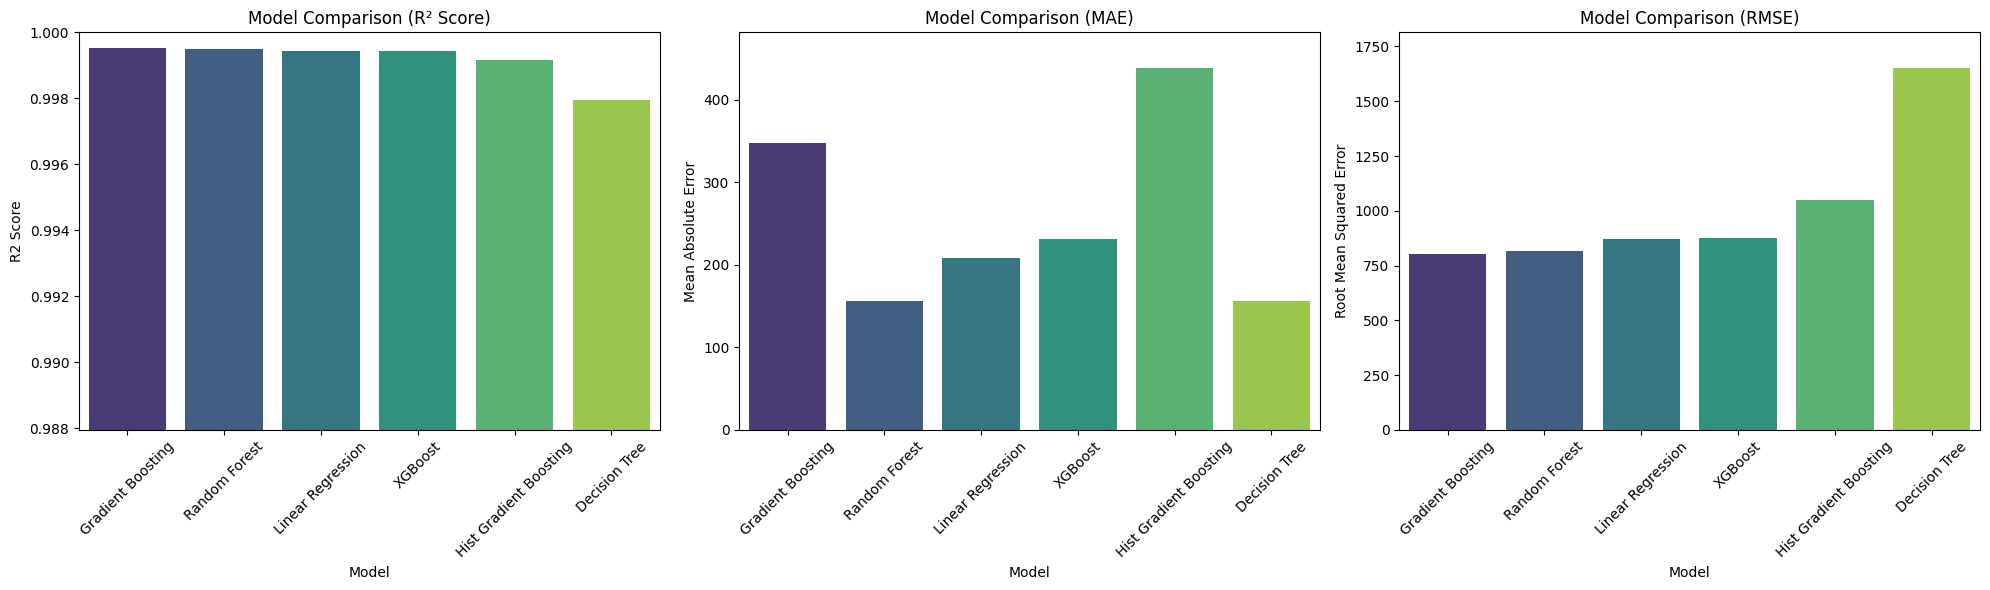


Performance Table:
                    Model  R2 Score         MAE         RMSE
3       Gradient Boosting  0.999514  348.066849   800.443902
2           Random Forest  0.999494  156.513564   817.164700
0       Linear Regression  0.999422  207.668000   873.069915
5                 XGBoost  0.999420  231.385254   874.680120
4  Hist Gradient Boosting  0.999167  437.795437  1048.033619
6          Neural Network  0.998501  476.233271  1405.855120
1           Decision Tree  0.997936  156.598272  1649.636657


In [358]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd # Ensure pandas is imported

# Define models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Hist Gradient Boosting': HistGradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(128, 64),activation='relu',solver='adam',learning_rate_init=0.001,max_iter=3000,random_state=42)
}

# Store results
results = []

# Assuming X_train_scaled, X_test_scaled, y_train, y_test are already defined and scaled
# Loop over models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append({
        'Model': name,
        'R2 Score': r2,
        'MAE': mae,
        'RMSE': rmse
    })

# Create DataFrame for visualization
results_df = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False)

# Filter out the Neural Network for better visualization of other models
filtered_results_df = results_df[results_df['Model'] != 'Neural Network'].reset_index(drop=True)

# 📊 Plotting - Separate plots for each metric
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# R2 Score plot
sns.barplot(ax=axes[0], data=filtered_results_df, x='Model', y='R2 Score', hue='Model', palette='viridis', legend=False)
axes[0].set_title("Model Comparison (R² Score)")
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylim(filtered_results_df['R2 Score'].min() * 0.99, 1.0) # Tighten y-axis

# MAE plot
sns.barplot(ax=axes[1], data=filtered_results_df, x='Model', y='MAE', hue='Model', palette='viridis', legend=False)
axes[1].set_title("Model Comparison (MAE)")
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylabel("Mean Absolute Error")
axes[1].set_ylim(0, filtered_results_df['MAE'].max() * 1.1) # Set y-axis starting from 0

# RMSE plot
sns.barplot(ax=axes[2], data=filtered_results_df, x='Model', y='RMSE', hue='Model', palette='viridis', legend=False)
axes[2].set_title("Model Comparison (RMSE)")
axes[2].tick_params(axis='x', rotation=45)
axes[2].set_ylabel("Root Mean Squared Error")
axes[2].set_ylim(0, filtered_results_df['RMSE'].max() * 1.1) # Set y-axis starting from 0


plt.tight_layout()
plt.show()

# 🔍 Optional: Print performance table
print("\nPerformance Table:")
print(results_df)

In [359]:
!pip install streamlit pyngrok --quiet

In [360]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

# Define base models
base_models = {
    'linear_regression': LinearRegression(),
    'decision_tree': DecisionTreeRegressor(random_state=42),
    'random_forest': RandomForestRegressor(random_state=42),
    'hist_gradient_boosting': HistGradientBoostingRegressor(random_state=42),
    'xgboost': XGBRegressor(random_state=42),
    'neural_network': MLPRegressor(random_state=42, max_iter=1000)
}

# Train base models and create meta-features
# Initialize the DataFrame with the same index as X_train
meta_features_train = pd.DataFrame(index=X_train.index)

for name, model in base_models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    # The predictions will align automatically because we're predicting on X_train
    meta_features_train[name] = model.predict(X_train)

display(meta_features_train.head())

Training linear_regression...
Training decision_tree...
Training random_forest...
Training hist_gradient_boosting...
Training xgboost...
Training neural_network...


,linear_regression,decision_tree,random_forest,hist_gradient_boosting,xgboost,neural_network
2247,200114.727141,200000.0,200000.0,199865.204363,199902.937500,200107.574106
3698,200321.634490,200000.0,200000.0,198951.623473,200033.531250,200163.912773
2793,131511.246590,131300.0,131278.0,131219.691746,131254.843750,131740.487250
1783,120029.663267,120000.0,120000.0,120122.237926,119993.171875,120429.901322
1831,130051.395846,130000.0,130000.0,129948.617246,129992.804688,130388.924803


In [361]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Set Streamlit page config
st.set_page_config(page_title="📊 Salary Prediction App", layout="wide")
st.title("💼 Salary Prediction & Model Evaluation Dashboard")

# Load the fixed dataset
@st.cache_data
def load_data():
    return pd.read_csv("/content/ds_salaries.csv")  # Fixed dataset path

df = load_data()

# Sidebar Menu
st.sidebar.title("☰ Menu")
page = st.sidebar.radio("Navigate", ["📂 Dataset View", "📈 Model Metrics", "📊 Graph Comparison"])

# Download button
@st.cache_data

def convert_df(df):
    return df.to_csv(index=False).encode('utf-8')

csv = convert_df(df)
st.sidebar.download_button("📥 Download Dataset", csv, "salary_dataset.csv", "text/csv")

# Encode data only once globally
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

X = df_encoded.drop(columns=['salary_in_usd'])
y = df['salary_in_usd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dataset View
if page == "📂 Dataset View":
    st.subheader("📂 Dataset Overview")
    num_rows = st.slider("Choose how many rows to display:", 5, 100, 10, step=5)
    st.dataframe(df.head(num_rows), use_container_width=True)

# Model Metrics Page
elif page == "📈 Model Metrics":
    st.subheader("🤖 Model Evaluation Metrics")

    models = {
        "Linear Regression": LinearRegression(),
        "Decision Tree": DecisionTreeRegressor(random_state=42),
        "Random Forest": RandomForestRegressor(random_state=42),
        "Gradient Boosting": GradientBoostingRegressor(random_state=42),
        "Hist Gradient Boosting": HistGradientBoostingRegressor(random_state=42),
        "XGBoost": XGBRegressor(random_state=42),
        "Neural Network": MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
    }

    results = []
    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        results.append({
            'Model': name,
            'R2 Score': r2_score(y_test, y_pred),
            'MAE': mean_absolute_error(y_test, y_pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
        })

    results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
    st.dataframe(results_df, use_container_width=True)

# Graph Comparison Page
elif page == "📊 Graph Comparison":
    st.subheader("📊 Visual Comparison of Model Metrics")

    models = {
        "Linear Regression": LinearRegression(),
        "Decision Tree": DecisionTreeRegressor(random_state=42),
        "Random Forest": RandomForestRegressor(random_state=42),
        "Gradient Boosting": GradientBoostingRegressor(random_state=42),
        "Hist Gradient Boosting": HistGradientBoostingRegressor(random_state=42),
        "XGBoost": XGBRegressor(random_state=42),
        "Neural Network": MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
    }

    results = []
    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        results.append({
            'Model': name,
            'R2 Score': r2_score(y_test, y_pred),
            'MAE': mean_absolute_error(y_test, y_pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
        })

    graph_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
    graph_df = graph_df[graph_df['Model'] != 'Neural Network']  # Optional filter

    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    sns.barplot(ax=axes[0], data=graph_df, x='Model', y='R2 Score', palette='coolwarm')
    axes[0].set_title("R² Score Comparison")
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].set_ylim(0, 1.0)

    sns.barplot(ax=axes[1], data=graph_df, x='Model', y='MAE', palette='coolwarm')
    axes[1].set_title("Mean Absolute Error (MAE)")
    axes[1].tick_params(axis='x', rotation=45)

    sns.barplot(ax=axes[2], data=graph_df, x='Model', y='RMSE', palette='coolwarm')
    axes[2].set_title("Root Mean Squared Error (RMSE)")
    axes[2].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    st.pyplot(fig)

# Footer
st.markdown("---")
st.markdown("Made with ❤️ using Streamlit | Author: [Madana Venkatesh] 💼")

Overwriting app.py


In [362]:
!ngrok config add-authtoken 30JCufjPkBWMH6wDWM5DwfnbwKj_5Fz5DYbkWUsxBe4qbh8fk

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [363]:
!pkill -f streamlit
!pkill -f ngrok

from pyngrok import ngrok
ngrok.set_auth_token("30JCufjPkBWMH6wDWM5DwfnbwKj_5Fz5DYbkWUsxBe4qbh8fk")

import threading
import os
import time

def run_app():
    os.system("streamlit run app.py --server.port 8501")

thread = threading.Thread(target=run_app)
thread.start()

time.sleep(7)

public_url = ngrok.connect(8501)
print("🔗 Your app is live at:")
print(public_url)

🔗 Your app is live at:
NgrokTunnel: "https://2c5094f8d02b.ngrok-free.app" -> "http://localhost:8501"
